In [2]:
import numpy as np
import pandas as pd

In [3]:
pd.__version__

'0.25.0'

In [8]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer:Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into Data

In [15]:
# used_cols = [str(x) for x in range(24)]
used_cols = [str(x) for x in range(24)]
# data = pd.read_csv('data/train.csv', encoding="big5", usecols = used_cols)
data = pd.read_csv('data/train.csv', encoding="big5")
data.head()

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5


pandas.core.frame.DataFrame

In [10]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')

In [24]:
npdata = data[used_cols].to_numpy()
npdata.shape

(4320, 24)

In [25]:
newdata = npdata.reshape((240,18,24))

In [26]:
newdata = newdata.transpose((0,2,1))

In [29]:
# data['測項'][:18]
new_df = pd.DataFrame(data=newdata.reshape((240*24, 18)),
                        columns=data['測項'][:18])

In [30]:
new_df.head()

測項,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,14,1.8,0.51,0.2,0.9,16,17,16,56,26,NR,77,1.8,2,37,35,1.4,0.5
1,14,1.8,0.41,0.15,0.6,9.2,9.8,30,50,39,NR,68,2,2,80,79,1.8,0.9
2,14,1.8,0.39,0.13,0.5,8.2,8.7,27,48,36,NR,67,1.7,2,57,2.4,1,0.6
3,13,1.8,0.37,0.12,1.7,6.9,8.6,23,35,35,NR,74,1.6,1.9,76,55,0.6,0.3
4,12,1.8,0.35,0.11,1.8,6.8,8.5,24,25,31,NR,72,1.9,1.9,110,94,1.7,0.6


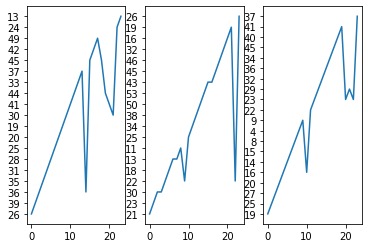

In [69]:
import matplotlib.pyplot as plt

# plt.figure(1)
plt.subplot(1,3, 1)
plt.plot([x for x in range(24)], new_df['PM2.5'][:24])
plt.subplot(1,3,2)
# plt.plot([4,5,6])
plt.plot([x for x in range(24)], new_df['PM2.5'][24:24*2])

plt.subplot(1,3,3)
plt.plot([x for x in range(24)], new_df['PM2.5'][24*2:24*3])

plt.show()

In [ ]:
# 考虑时间列加进来